In [1]:
import os
os.listdir('../input')

['heart-disease-uci']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvep5pzs4
  JVM stdout: /tmp/tmpvep5pzs4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvep5pzs4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_2378ng
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
dFrame = h2o.import_file('../input/heart-disease-uci/heart.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
dFrame.head()

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
dFrame.columns

['\ufeffage',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [8]:
dFrame.summary()

,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


In [9]:
dFrame.describe()

Rows:303
Cols:14




,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int,int,int,int,int,int,int,int,int,real,int,int,int,int
mins,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,54.36633663366333,0.6831683168316832,0.9669966996699675,131.62376237623772,246.26402640264035,0.1485148514851485,0.5280528052805283,149.6468646864687,0.32673267326732675,1.0396039603960392,1.3993399339933994,0.7293729372937293,2.313531353135314,0.5445544554455446
maxs,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0
sigma,9.08210098983786,0.46601082333962385,1.0320524894832983,17.538142813517098,51.83075098793005,0.35619787492797644,0.525859596359298,22.905161114914087,0.4697944645223165,1.1610750220686346,0.6162261453459621,1.0226063649693276,0.6122765072781408,0.49883478416439136
zeros,0,96,143,0,0,258,147,0,204,99,21,175,2,138
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0


In [10]:
dFrame.cor()

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


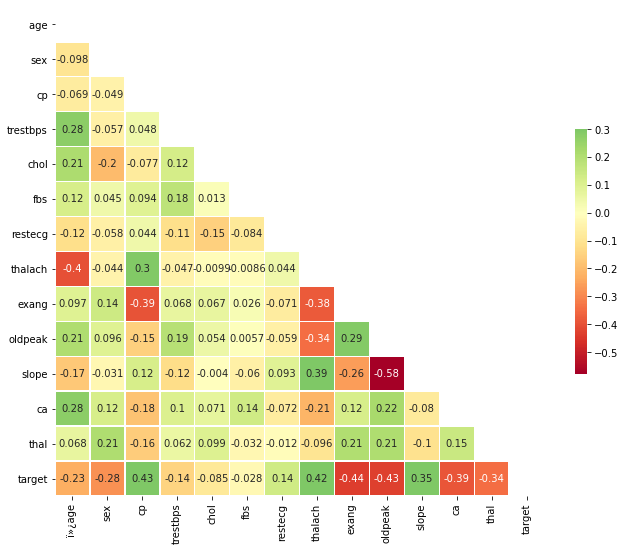

In [11]:
Corr = dFrame.cor().as_data_frame()
Corr.index = dFrame.columns
mask = np.triu(np.ones_like(Corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(Corr, mask=mask, cmap='RdYlGn', vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
 

In [12]:
train,valid, test = dFrame.split_frame(ratios=[0.6,0.1],seed=1234)

train["target"] = train["target"].asfactor()
valid["target"] = valid["target"].asfactor()
test["target"]  = test["target"].asfactor()

In [13]:
print(train.shape)
print("*"*20)
print(valid.shape)
print("*"*20)
print(test.shape)
print("*"*20)

(185, 14)
********************
(32, 14)
********************
(86, 14)
********************


In [14]:
predct = dFrame.columns[:-1]

In [15]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [16]:
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predct,y="target",training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [17]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1592649380019_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11019.0,4.0,5.0,4.98,7.0,16.0,12.88




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.015019592604081191
RMSE: 0.12255444750836744
LogLoss: 0.0939217678549615
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6206872083065069: 


,,0,1,Error,Rate
0,0,80.0,0.0,0.0,(0.0/80.0)
1,1,0.0,105.0,0.0,(0.0/105.0)
2,Total,80.0,105.0,0.0,(0.0/185.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.620687,1.000000,102.0
1,max f2,0.620687,1.000000,102.0
2,max f0point5,0.620687,1.000000,102.0
3,max accuracy,0.620687,1.000000,102.0
4,max precision,0.994329,1.000000,0.0
5,max recall,0.620687,1.000000,102.0
6,max specificity,0.994329,1.000000,0.0
7,max absolute_mcc,0.620687,1.000000,102.0
8,max min_per_class_accuracy,0.620687,1.000000,102.0
9,max mean_per_class_accuracy,0.620687,1.000000,102.0



Gains/Lift Table: Avg response rate: 56.76 %, avg score: 56.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.016216,0.993925,1.761905,1.761905,1.000000,0.994060,1.000000,0.994060,0.028571,0.028571,76.190476,76.190476
1,,2,0.021622,0.992088,1.761905,1.761905,1.000000,0.993522,1.000000,0.993925,0.009524,0.038095,76.190476,76.190476
2,,3,0.032432,0.991085,1.761905,1.761905,1.000000,0.991379,1.000000,0.993076,0.019048,0.057143,76.190476,76.190476
3,,4,0.043243,0.990670,1.761905,1.761905,1.000000,0.990843,1.000000,0.992518,0.019048,0.076190,76.190476,76.190476
4,,5,0.054054,0.989709,1.761905,1.761905,1.000000,0.990102,1.000000,0.992035,0.019048,0.095238,76.190476,76.190476
5,,6,0.102703,0.984029,1.761905,1.761905,1.000000,0.986999,1.000000,0.989650,0.085714,0.180952,76.190476,76.190476
6,,7,0.151351,0.978579,1.761905,1.761905,1.000000,0.981434,1.000000,0.987009,0.085714,0.266667,76.190476,76.190476
7,,8,0.200000,0.968227,1.761905,1.761905,1.000000,0.974073,1.000000,0.983862,0.085714,0.352381,76.190476,76.190476
8,,9,0.302703,0.948130,1.761905,1.761905,1.000000,0.957932,1.000000,0.975065,0.180952,0.533333,76.190476,76.190476
9,,10,0.400000,0.915154,1.761905,1.761905,1.000000,0.934848,1.000000,0.965282,0.171429,0.704762,76.190476,76.190476




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-06-20 10:36:27,0.050 sec,0.0,0.495414,0.683988,0.500000,0.567568,1.000000,0.432432
1,,2020-06-20 10:36:27,0.381 sec,1.0,0.467104,0.628455,0.932440,0.950659,1.761905,0.145946
2,,2020-06-20 10:36:27,0.431 sec,2.0,0.442075,0.581606,0.944881,0.958745,1.761905,0.135135
3,,2020-06-20 10:36:27,0.466 sec,3.0,0.419179,0.540070,0.953095,0.966266,1.761905,0.118919
4,,2020-06-20 10:36:27,0.493 sec,4.0,0.400119,0.506450,0.964167,0.974883,1.761905,0.102703
5,,2020-06-20 10:36:27,0.519 sec,5.0,0.383262,0.477012,0.966190,0.975538,1.761905,0.091892
6,,2020-06-20 10:36:27,0.546 sec,6.0,0.368044,0.450428,0.965119,0.974862,1.761905,0.091892
7,,2020-06-20 10:36:27,0.591 sec,7.0,0.354256,0.426543,0.969583,0.978768,1.761905,0.091892
8,,2020-06-20 10:36:27,0.620 sec,8.0,0.338820,0.400697,0.974524,0.982514,1.761905,0.064865
9,,2020-06-20 10:36:27,0.655 sec,9.0,0.328613,0.382483,0.974286,0.982181,1.761905,0.070270



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,cp,49.772530,1.000000,0.234219
1,ca,35.674095,0.716743,0.167875
2,﻿age,24.601374,0.494276,0.115769
3,thal,24.594597,0.494140,0.115737
4,oldpeak,20.618956,0.414264,0.097029
5,chol,14.614030,0.293616,0.068771
6,trestbps,13.263145,0.266475,0.062414
7,thalach,12.505259,0.251248,0.058847
8,sex,7.936414,0.159454,0.037347
9,restecg,4.235344,0.085094,0.019931


In [18]:
prfm = gbm.model_performance(valid)
print(prfm)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1336486752877018
RMSE: 0.36557991641732973
LogLoss: 0.4664779135599224
Mean Per-Class Error: 0.15625
AUC: 0.875
AUCPR: 0.9000100305272029
Gini: 0.75

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2657951768076915: 


,,0,1,Error,Rate
0,0,12.0,4.0,0.25,(4.0/16.0)
1,1,1.0,15.0,0.0625,(1.0/16.0)
2,Total,13.0,19.0,0.1562,(5.0/32.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.265795,0.857143,18.0
1,max f2,0.265795,0.903614,18.0
2,max f0point5,0.673415,0.855263,14.0
3,max accuracy,0.673415,0.843750,14.0
4,max precision,0.991354,1.000000,0.0
5,max recall,0.009800,1.000000,31.0
6,max specificity,0.991354,1.000000,0.0
7,max absolute_mcc,0.265795,0.699913,18.0
8,max min_per_class_accuracy,0.673415,0.812500,14.0
9,max mean_per_class_accuracy,0.673415,0.843750,14.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 49.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.03125,0.991243,2.000000,2.000000,1.000000,0.991354,1.000000,0.991354,0.0625,0.0625,100.000000,100.000000
1,,2,0.03125,0.991132,0.000000,2.000000,0.000000,0.000000,1.000000,0.991354,0.0000,0.0625,-100.000000,100.000000
2,,3,0.03125,0.991020,0.000000,2.000000,0.000000,0.000000,1.000000,0.991354,0.0000,0.0625,-100.000000,100.000000
3,,4,0.06250,0.990985,2.000000,2.000000,1.000000,0.990995,1.000000,0.991175,0.0625,0.1250,100.000000,100.000000
4,,5,0.06250,0.990973,0.000000,2.000000,0.000000,0.000000,1.000000,0.991175,0.0000,0.1250,-100.000000,100.000000
5,,6,0.12500,0.989693,2.000000,2.000000,1.000000,0.990447,1.000000,0.990811,0.1250,0.2500,100.000000,100.000000
6,,7,0.15625,0.985975,2.000000,2.000000,1.000000,0.987473,1.000000,0.990143,0.0625,0.3125,100.000000,100.000000
7,,8,0.21875,0.952061,2.000000,2.000000,1.000000,0.972894,1.000000,0.985215,0.1250,0.4375,100.000000,100.000000
8,,9,0.31250,0.868964,1.333333,1.800000,0.666667,0.903407,0.900000,0.960672,0.1250,0.5625,33.333333,80.000000
9,,10,0.40625,0.711283,1.333333,1.692308,0.666667,0.774019,0.846154,0.917599,0.1250,0.6875,33.333333,69.230769


In [19]:
tuning = H2OGradientBoostingEstimator(
    ntrees = 1000,
    learn_rate = 0.01,
    stopping_rounds = 22,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.8,
    seed = 1234
) 

In [20]:
tuning.train(x=predct, y="target", training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [21]:
print (tuning.model_performance(valid).auc()*100)

90.234375


In [22]:
from h2o.estimators import H2OXGBoostEstimator

In [23]:
xgb = H2OXGBoostEstimator(ntrees=1000,learn_rate=0.05,stopping_rounds=20,stopping_metric="AUC",nfolds=10,seed=1234)

In [24]:
xgb.train(x=predct,y="target",training_frame=train, validation_frame=valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [25]:
print(xgb.model_performance(valid).auc()*100)

88.671875


In [26]:
xgb.varimp

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1592649380019_152


Model Summary: 


,,number_of_trees
0,,809.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0019166548512985955
RMSE: 0.04377961684732514
LogLoss: 0.027377932905101543
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8265668749809265: 


,,0,1,Error,Rate
0,0,80.0,0.0,0.0,(0.0/80.0)
1,1,0.0,105.0,0.0,(0.0/105.0)
2,Total,80.0,105.0,0.0,(0.0/185.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.826567,1.000000,103.0
1,max f2,0.826567,1.000000,103.0
2,max f0point5,0.826567,1.000000,103.0
3,max accuracy,0.826567,1.000000,103.0
4,max precision,0.999798,1.000000,0.0
5,max recall,0.826567,1.000000,103.0
6,max specificity,0.999798,1.000000,0.0
7,max absolute_mcc,0.826567,1.000000,103.0
8,max min_per_class_accuracy,0.826567,1.000000,103.0
9,max mean_per_class_accuracy,0.826567,1.000000,103.0



Gains/Lift Table: Avg response rate: 56.76 %, avg score: 56.76 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,0.999708,1.761905,1.761905,1.000000,0.999779,1.000000,0.999779,0.019048,0.019048,76.190476,76.190476
1,,2,0.021622,0.999639,1.761905,1.761905,1.000000,0.999671,1.000000,0.999725,0.019048,0.038095,76.190476,76.190476
2,,3,0.032432,0.999619,1.761905,1.761905,1.000000,0.999632,1.000000,0.999694,0.019048,0.057143,76.190476,76.190476
3,,4,0.043243,0.999442,1.761905,1.761905,1.000000,0.999531,1.000000,0.999653,0.019048,0.076190,76.190476,76.190476
4,,5,0.054054,0.999277,1.761905,1.761905,1.000000,0.999352,1.000000,0.999593,0.019048,0.095238,76.190476,76.190476
5,,6,0.102703,0.998620,1.761905,1.761905,1.000000,0.999066,1.000000,0.999344,0.085714,0.180952,76.190476,76.190476
6,,7,0.151351,0.997119,1.761905,1.761905,1.000000,0.997910,1.000000,0.998883,0.085714,0.266667,76.190476,76.190476
7,,8,0.200000,0.995477,1.761905,1.761905,1.000000,0.996348,1.000000,0.998266,0.085714,0.352381,76.190476,76.190476
8,,9,0.302703,0.988260,1.761905,1.761905,1.000000,0.991940,1.000000,0.996120,0.180952,0.533333,76.190476,76.190476
9,,10,0.400000,0.975147,1.761905,1.761905,1.000000,0.981035,1.000000,0.992451,0.171429,0.704762,76.190476,76.190476




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13509615231245176
RMSE: 0.3675542848511656
LogLoss: 0.5209755533243497
Mean Per-Class Error: 0.15625
AUC: 0.88671875
AUCPR: 0.9004527191639424
Gini: 0.7734375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13050006330013275: 


,,0,1,Error,Rate
0,0,12.0,4.0,0.25,(4.0/16.0)
1,1,1.0,15.0,0.0625,(1.0/16.0)
2,Total,13.0,19.0,0.1562,(5.0/32.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.130500,0.857143,18.0
1,max f2,0.130500,0.903614,18.0
2,max f0point5,0.847481,0.859375,11.0
3,max accuracy,0.608163,0.843750,14.0
4,max precision,0.999267,1.000000,0.0
5,max recall,0.003073,1.000000,28.0
6,max specificity,0.999267,1.000000,0.0
7,max absolute_mcc,0.130500,0.699913,18.0
8,max min_per_class_accuracy,0.608163,0.812500,14.0
9,max mean_per_class_accuracy,0.608163,0.843750,14.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 46.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.03125,0.999216,2.000000,2.000000,1.000000,0.999267,1.000000,0.999267,0.0625,0.0625,100.000000,100.000000
1,,2,0.03125,0.999165,0.000000,2.000000,0.000000,0.000000,1.000000,0.999267,0.0000,0.0625,-100.000000,100.000000
2,,3,0.03125,0.999115,0.000000,2.000000,0.000000,0.000000,1.000000,0.999267,0.0000,0.0625,-100.000000,100.000000
3,,4,0.06250,0.999046,2.000000,2.000000,1.000000,0.999103,1.000000,0.999185,0.0625,0.1250,100.000000,100.000000
4,,5,0.06250,0.998972,0.000000,2.000000,0.000000,0.000000,1.000000,0.999185,0.0000,0.1250,-100.000000,100.000000
5,,6,0.12500,0.998685,2.000000,2.000000,1.000000,0.998811,1.000000,0.998998,0.1250,0.2500,100.000000,100.000000
6,,7,0.15625,0.997983,2.000000,2.000000,1.000000,0.998033,1.000000,0.998805,0.0625,0.3125,100.000000,100.000000
7,,8,0.21875,0.980490,2.000000,2.000000,1.000000,0.989445,1.000000,0.996131,0.1250,0.4375,100.000000,100.000000
8,,9,0.31250,0.928998,1.333333,1.800000,0.666667,0.967223,0.900000,0.987458,0.1250,0.5625,33.333333,80.000000
9,,10,0.40625,0.680971,1.333333,1.692308,0.666667,0.814723,0.846154,0.947596,0.1250,0.6875,33.333333,69.230769




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.17714579377810843
RMSE: 0.4208869132891975
LogLoss: 0.6706167978492438
Mean Per-Class Error: 0.19970238095238102
AUC: 0.8317857142857144
AUCPR: 0.8586574666752127
Gini: 0.6635714285714287

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6042366623878479: 


,,0,1,Error,Rate
0,0,60.0,20.0,0.25,(20.0/80.0)
1,1,16.0,89.0,0.1524,(16.0/105.0)
2,Total,76.0,109.0,0.1946,(36.0/185.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.604237,0.831776,108.0
1,max f2,0.006018,0.894378,165.0
2,max f0point5,0.639504,0.825516,106.0
3,max accuracy,0.639504,0.805405,106.0
4,max precision,0.999939,1.000000,0.0
5,max recall,0.006018,1.000000,165.0
6,max specificity,0.999939,1.000000,0.0
7,max absolute_mcc,0.639504,0.602535,106.0
8,max min_per_class_accuracy,0.757944,0.780952,98.0
9,max mean_per_class_accuracy,0.639504,0.800298,106.0



Gains/Lift Table: Avg response rate: 56.76 %, avg score: 59.50 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010811,0.999741,1.761905,1.761905,1.000000,0.999878,1.000000,0.999878,0.019048,0.019048,76.190476,76.190476
1,,2,0.021622,0.999678,1.761905,1.761905,1.000000,0.999711,1.000000,0.999794,0.019048,0.038095,76.190476,76.190476
2,,3,0.032432,0.999629,1.761905,1.761905,1.000000,0.999658,1.000000,0.999749,0.019048,0.057143,76.190476,76.190476
3,,4,0.043243,0.999494,1.761905,1.761905,1.000000,0.999555,1.000000,0.999700,0.019048,0.076190,76.190476,76.190476
4,,5,0.054054,0.999214,1.761905,1.761905,1.000000,0.999376,1.000000,0.999635,0.019048,0.095238,76.190476,76.190476
5,,6,0.102703,0.997714,1.566138,1.669173,0.888889,0.998599,0.947368,0.999145,0.076190,0.171429,56.613757,66.917293
6,,7,0.151351,0.994981,1.566138,1.636054,0.888889,0.996280,0.928571,0.998224,0.076190,0.247619,56.613757,63.605442
7,,8,0.200000,0.990303,1.566138,1.619048,0.888889,0.993331,0.918919,0.997034,0.076190,0.323810,56.613757,61.904762
8,,9,0.302703,0.962949,1.298246,1.510204,0.736842,0.980200,0.857143,0.991322,0.133333,0.457143,29.824561,51.020408
9,,10,0.400000,0.889745,1.468254,1.500000,0.833333,0.930433,0.851351,0.976511,0.142857,0.600000,46.825397,50.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.8626214,0.09488737,0.85714287,1.0,0.88,0.84210527,0.8,0.82608694,0.8,0.6923077,0.9285714,1.0
1,auc,0.87432975,0.10039906,0.875,1.0,0.9025974,0.87777776,0.81,0.8015873,0.8080808,0.6904762,0.9777778,1.0
2,aucpr,0.88035256,0.11032822,0.9536728,1.0,0.90849596,0.8470639,0.82010365,0.87842625,0.7837221,0.6485051,0.96353567,1.0
3,err,0.13737857,0.09488737,0.14285715,0.0,0.12,0.15789473,0.2,0.17391305,0.2,0.30769232,0.071428575,0.0
4,err_count,2.5,1.6499158,2.0,0.0,3.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0
5,f0point5,0.857422,0.10523231,0.9,1.0,0.8783784,0.8064516,0.8333333,0.88709676,0.754717,0.65217394,0.86206895,1.0
6,f1,0.87491393,0.0850264,0.9,1.0,0.8965517,0.8695652,0.7777778,0.84615386,0.8,0.75,0.90909094,1.0
7,f2,0.89918345,0.08570422,0.9,1.0,0.91549295,0.9433962,0.7291667,0.8088235,0.85106385,0.88235295,0.96153843,1.0
8,lift_top_group,1.8667461,0.45555654,1.4,1.3333334,1.7857143,1.9,2.0,1.6428572,2.2222223,2.1666667,2.8,1.4166666
9,logloss,0.65822315,0.2964524,0.50526977,0.606673,0.50632393,0.6176903,1.1185699,0.9586231,0.7594991,0.9893427,0.28419417,0.23604545



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-20 10:36:53,22.636 sec,0.0,0.500000,0.693147,0.500000,0.567568,1.000000,0.432432,0.500000,0.693147,0.500000,0.500000,1.0,0.50000
1,,2020-06-20 10:36:53,22.658 sec,1.0,0.484906,0.663397,0.967083,0.967138,1.729277,0.102703,0.486027,0.665575,0.929688,0.946198,2.0,0.09375
2,,2020-06-20 10:36:53,22.683 sec,2.0,0.471360,0.637391,0.964881,0.965621,1.729277,0.091892,0.474428,0.643207,0.894531,0.925010,2.0,0.15625
3,,2020-06-20 10:36:53,22.705 sec,3.0,0.458657,0.613521,0.966310,0.966318,1.729277,0.091892,0.463527,0.622548,0.894531,0.925010,2.0,0.15625
4,,2020-06-20 10:36:53,22.744 sec,4.0,0.445982,0.590206,0.984464,0.987974,1.761905,0.054054,0.453517,0.603869,0.916016,0.940544,2.0,0.09375
5,,2020-06-20 10:36:53,22.769 sec,5.0,0.434341,0.569172,0.984464,0.987602,1.761905,0.054054,0.444383,0.586996,0.912109,0.937405,2.0,0.12500
6,,2020-06-20 10:36:53,22.786 sec,6.0,0.423239,0.549414,0.987143,0.989682,1.761905,0.037838,0.437609,0.574497,0.912109,0.936283,2.0,0.09375
7,,2020-06-20 10:36:53,22.802 sec,7.0,0.412915,0.531297,0.987976,0.990546,1.761905,0.037838,0.430339,0.561176,0.908203,0.933144,2.0,0.12500
8,,2020-06-20 10:36:53,22.824 sec,8.0,0.403002,0.514078,0.988095,0.990682,1.761905,0.032432,0.421666,0.545533,0.908203,0.933144,2.0,0.12500
9,,2020-06-20 10:36:53,22.851 sec,9.0,0.392963,0.496873,0.989762,0.992250,1.761905,0.027027,0.416185,0.535505,0.912109,0.936283,2.0,0.09375



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,cp,460.968475,1.000000,0.186699
1,ca,361.981506,0.785263,0.146608
2,thal,294.437683,0.638737,0.119252
3,﻿age,290.202332,0.629549,0.117536
4,oldpeak,246.460739,0.534659,0.099820
5,thalach,215.430099,0.467342,0.087252
6,chol,195.031998,0.423092,0.078991
7,trestbps,142.216339,0.308516,0.057600
8,sex,107.250053,0.232662,0.043438
9,restecg,94.744774,0.205534,0.038373


<bound method ModelBase.varimp of >

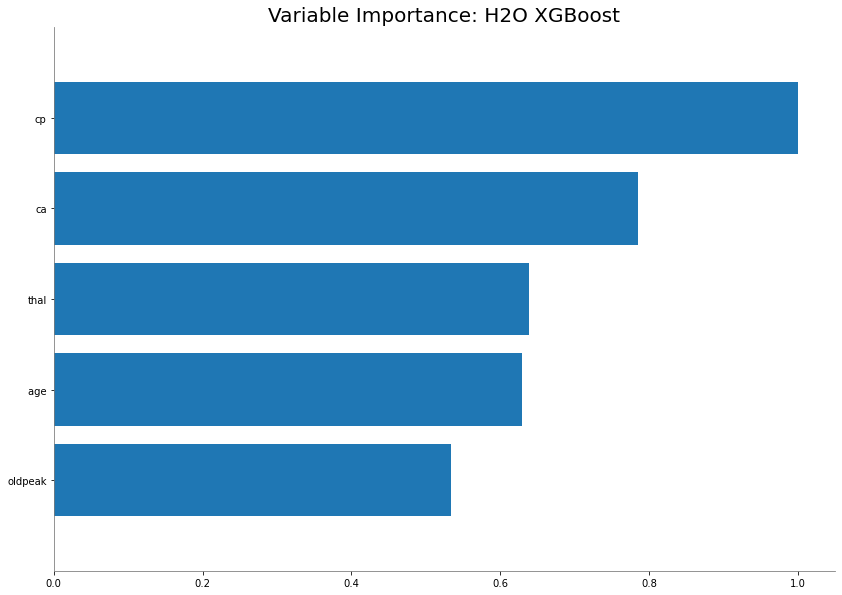

In [27]:
xgb.varimp_plot(num_of_features =5)

In [28]:
#Use with autoML
from h2o.automl import H2OAutoML

In [29]:
autoML = H2OAutoML(max_models=15,max_runtime_secs=150,seed=3)
autoML.train(x=predct,y="target",training_frame = train, validation_frame=valid)

AutoML progress: |
10:36:59.755: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██████████
10:37:12.930: Skipping training of model GBM_5_AutoML_20200620_103659 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20200620_103659.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 185.0.


██████████████████████████████████████████████| 100%


In [30]:
print("*"*102)
print(autoML.leaderboard)
print("*"*102)

******************************************************************************************************


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20200620_103659_model_1,0.90119,0.392781,0.920302,0.191071,0.352947,0.124572
GBM_4_AutoML_20200620_103659,0.899048,0.40076,0.924108,0.172619,0.35785,0.128056
DRF_1_AutoML_20200620_103659,0.895417,0.571825,0.898022,0.184821,0.359165,0.129
XGBoost_1_AutoML_20200620_103659,0.894702,0.404569,0.904374,0.171131,0.356706,0.127239
StackedEnsemble_BestOfFamily_AutoML_20200620_103659,0.894167,0.408917,0.904679,0.164881,0.3586,0.128594
GBM_2_AutoML_20200620_103659,0.893929,0.408357,0.913972,0.19256,0.361398,0.130609
GBM_3_AutoML_20200620_103659,0.886905,0.419449,0.910855,0.180655,0.364917,0.133164
GLM_1_AutoML_20200620_103659,0.885357,0.424541,0.906343,0.183929,0.370201,0.137049
GBM_1_AutoML_20200620_103659,0.885357,0.448896,0.90927,0.177083,0.377425,0.14245
XGBoost_3_AutoML_20200620_103659,0.881131,0.448744,0.895231,0.234821,0.380471,0.144758



******************************************************************************************************


In [31]:
#We can get the information as GBM is perfoming well with aprox ~90% area under curve and 0.39 log loss.

In [32]:
#Please upvote the kernal if this feels informative. :)